<a href="https://colab.research.google.com/github/T0nT0n/KatLeskova/blob/master/%D0%98%D1%82%D0%BE%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Работа с данными

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as prepro

from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data", header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
names = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]
data.columns = names
data = data.drop(columns=['Id'])
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
data['Class'].replace({1: "building_windows_float_processed",
                       2: "building_windows_non_float_processed",
                       3: "vehicle_windows_float_processed",
                       4: "vehicle_windows_non_float_processed",
                       5: "containers",
                       6: "tableware",
                       7: "headlamps"}, inplace = True)
data['Class'].value_counts()

building_windows_non_float_processed    76
building_windows_float_processed        70
headlamps                               29
vehicle_windows_float_processed         17
containers                              13
tableware                                9
Name: Class, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


Добавим случайные пропуски

In [ ]:
for col in data.columns:
  fr = np.random.randint(5,10)/100
  data.loc[data.sample(frac = fr).index, col] = np.nan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      197 non-null    float64
 1   Na      201 non-null    float64
 2   Mg      195 non-null    float64
 3   Al      203 non-null    float64
 4   Si      199 non-null    float64
 5   K       199 non-null    float64
 6   Ca      197 non-null    float64
 7   Ba      197 non-null    float64
 8   Fe      199 non-null    float64
 9   Class   199 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


# Data Vizualization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      201 non-null    float64
 1   Na      201 non-null    float64
 2   Mg      203 non-null    float64
 3   Al      195 non-null    float64
 4   Si      201 non-null    float64
 5   K       195 non-null    float64
 6   Ca      201 non-null    float64
 7   Ba      199 non-null    float64
 8   Fe      195 non-null    float64
 9   Class   203 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,201.000000,201.000000,203.000000,195.000000,201.000000,195.000000,201.000000,199.000000,195.000000
mean,1.518332,13.410249,2.658966,1.459026,72.660149,0.504513,8.976716,0.168141,0.059282
std,0.002909,0.832508,1.456086,0.485089,0.784927,0.678622,1.441033,0.490491,0.100013
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.790000,0.000000,0.000000
25%,1.516520,12.890000,1.865000,1.190000,72.280000,0.120000,8.230000,0.000000,0.000000
50%,1.517680,13.310000,3.480000,1.380000,72.790000,0.560000,8.600000,0.000000,0.000000
75%,1.519180,13.830000,3.600000,1.635000,73.100000,0.610000,9.150000,0.000000,0.100000
max,1.531250,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [ ]:
data['Class'].describe()

count                                      203
unique                                       6
top       building_windows_non_float_processed
freq                                        73
Name: Class, dtype: object

In [ ]:
data['Class'].value_counts()

building_windows_non_float_processed    73
building_windows_float_processed        64
headlamps                               28
vehicle_windows_float_processed         16
containers                              13
tableware                                9
Name: Class, dtype: int64

In [ ]:
display(data['Class'].describe())
display(print('============================='))
display(data['Class'].value_counts())

count                                      203
unique                                       6
top       building_windows_non_float_processed
freq                                        73
Name: Class, dtype: object

None

building_windows_non_float_processed    73
building_windows_float_processed        64
headlamps                               28
vehicle_windows_float_processed         16
containers                              13
tableware                                9
Name: Class, dtype: int64

# GIT

In [ ]:
!git init
Initialized empty Git repoitory in /

SyntaxError: ignored

In [ ]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

Занятие 2

In [ ]:
for col in data.columns:
  missing_values_counts = data[col].isna().sum()
  percentage = 100 * missing_values_counts / len(data[col])
  print("Column", col, "comtains", missing_values_counts, "NULL values (", percentage, "% ).")

#Гистограмм

<function matplotlib.pyplot.show>

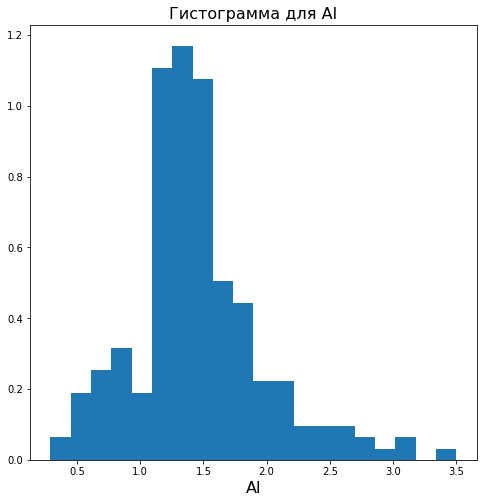

In [ ]:
col = 'Al'

fig, ax = plt.subplots(figsize = (8,8))

ax.hist(data[col], density=True, bins=20)

ax.set_xlabel(col, fontsize = 16)
ax.set_title('Гистограмма для '+str(col), fontsize = 16)

plt.show

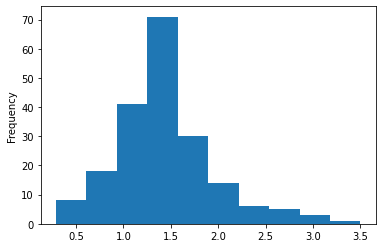

In [ ]:
data['Al'].plot(kind = 'hist')

<function matplotlib.pyplot.show>

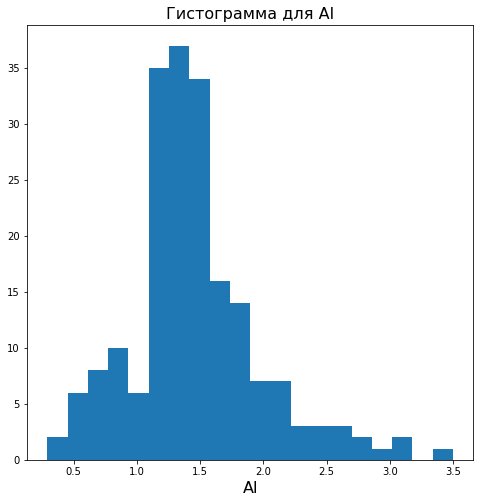

In [ ]:
ax = data['Al'].plot(kind = 'hist', bins=20, figsize = (8,8))
ax.set_xlabel('Al', fontsize = 16)
ax.set_ylabel(None)
ax.set_title('Гистограмма для '+str('Al'), fontsize = 16)
plt.show

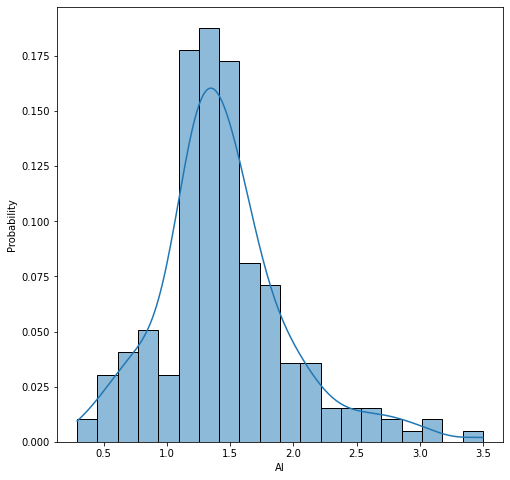

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data = data, x = "Al", bins=20, kde=True, stat='probability')

plt.show()

#Для категорий

In [ ]:
df1 = data['Class'].value_counts()

In [ ]:
df1.index.values

array(['building_windows_non_float_processed',
       'building_windows_float_processed', 'headlamps',
       'vehicle_windows_float_processed', 'containers', 'tableware'],
      dtype=object)

In [ ]:
df1.values

array([73, 64, 28, 16, 13,  9])

<function matplotlib.pyplot.show>

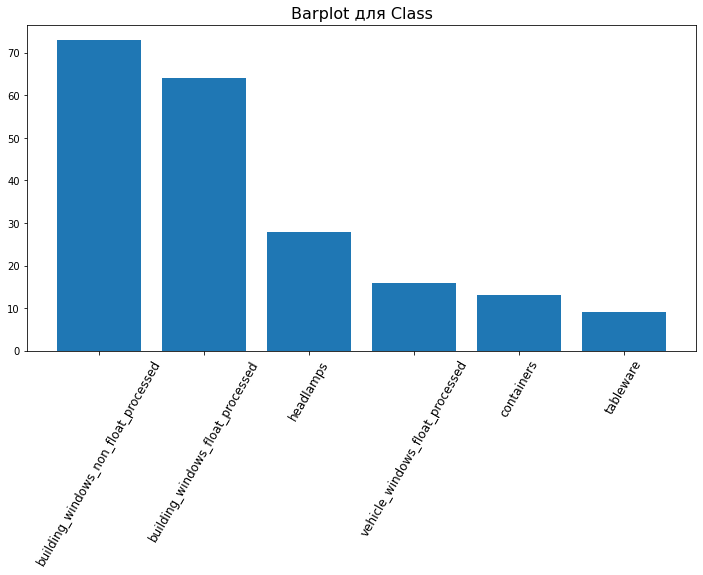

In [ ]:
col = 'Class'
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(data['Class'].value_counts().index.values, data['Class'].value_counts().values)
ax.set_xlabel(None, fontsize = 16)
ax.set_title('Barplot для '+str(col), fontsize = 16)
ax.tick_params(axis='x', which = 'major', labelsize = 12, rotation = 60)
plt.show

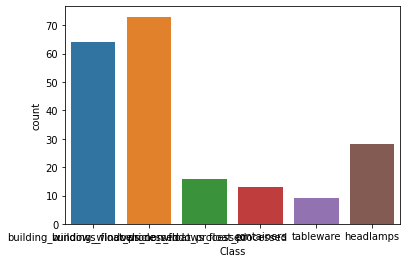

In [ ]:
sns.countplot(x = "Class", data = data)

#Занятие 3

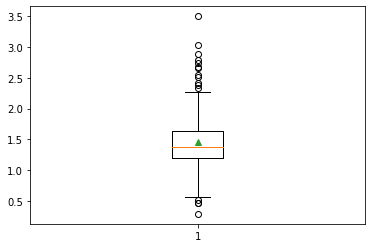

In [ ]:
col='Al'
fig, ax = plt.subplots()
data1 = data[col][~np.isnan(data[col])].copy()
ax.boxplot(data1, showmeans=True) 
plt.show()

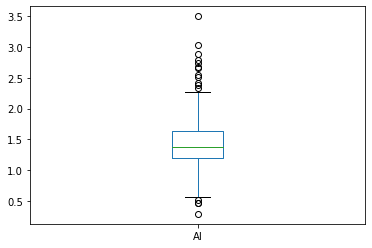

In [ ]:
data[col].plot(kind='box')

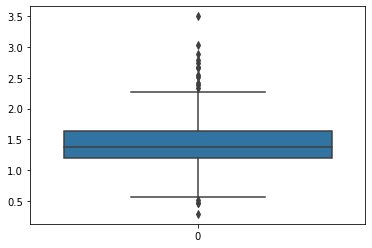

In [ ]:
sns.boxplot(data=data[col])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


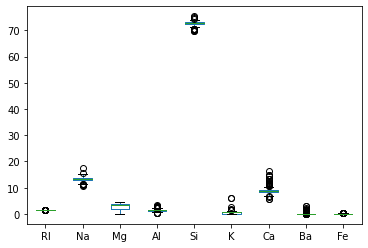

In [ ]:
data.plot(kind='box')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


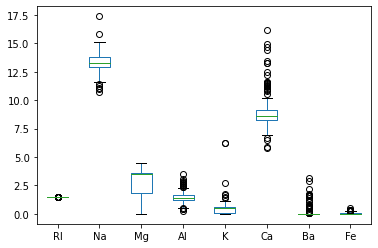

In [ ]:
data.columns.values
data[data.columns.values[data.columns.values!='Si']].plot(kind='box')
plt.show()

In [ ]:
scaler1 = prepro.MinMaxScaler()
data1 = scaler1.fit_transform(data[data.columns.values[data.columns.values!='Class']])
data1 = pd.DataFrame(data1)
data1

,0,1,2,3,4,5,6,7,8
0,NaN,0.437594,1.000000,0.252336,0.351786,0.009662,0.284615,NaN,0.0
1,NaN,0.475188,0.801782,0.333333,0.521429,0.077295,0.196154,0.000000,0.0
2,0.250249,0.421053,0.790646,0.389408,0.567857,0.062802,0.191346,0.000000,0.0
3,0.323881,0.372932,0.821826,0.311526,0.500000,0.091787,0.233654,NaN,0.0
4,0.311940,0.381955,0.806236,0.295950,0.583929,0.088567,0.219231,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.252736,0.512782,0.000000,0.806854,0.500000,0.012882,0.325962,0.336508,0.0
210,0.283582,0.630075,0.000000,0.529595,0.580357,0.000000,0.250962,0.504762,0.0
211,0.472637,0.545865,0.000000,0.538941,0.644643,0.000000,0.254808,0.520635,0.0
212,0.266667,0.548872,0.000000,0.514019,0.678571,NaN,0.258654,0.498413,0.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


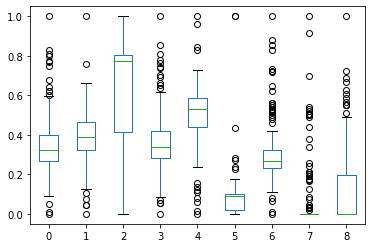

In [ ]:
data1[data1.columns.values].plot(kind='box')
plt.show()

In [ ]:
scaler2 = prepro.StandardScaler()
data2 = scaler1.fit_transform(data[data.columns.values[data.columns.values!='Class']])
data2 = pd.DataFrame(data2)
data2

,0,1,2,3,4,5,6,7,8
0,NaN,0.437594,1.000000,0.252336,0.351786,0.009662,0.284615,NaN,0.0
1,NaN,0.475188,0.801782,0.333333,0.521429,0.077295,0.196154,0.000000,0.0
2,0.250249,0.421053,0.790646,0.389408,0.567857,0.062802,0.191346,0.000000,0.0
3,0.323881,0.372932,0.821826,0.311526,0.500000,0.091787,0.233654,NaN,0.0
4,0.311940,0.381955,0.806236,0.295950,0.583929,0.088567,0.219231,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.252736,0.512782,0.000000,0.806854,0.500000,0.012882,0.325962,0.336508,0.0
210,0.283582,0.630075,0.000000,0.529595,0.580357,0.000000,0.250962,0.504762,0.0
211,0.472637,0.545865,0.000000,0.538941,0.644643,0.000000,0.254808,0.520635,0.0
212,0.266667,0.548872,0.000000,0.514019,0.678571,NaN,0.258654,0.498413,0.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


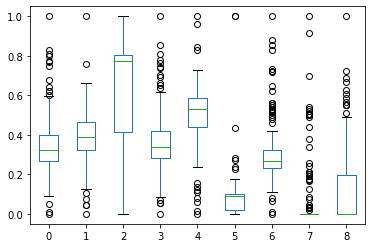

In [ ]:
data2.plot(kind='box')
plt.show()

#Метод главных компонент

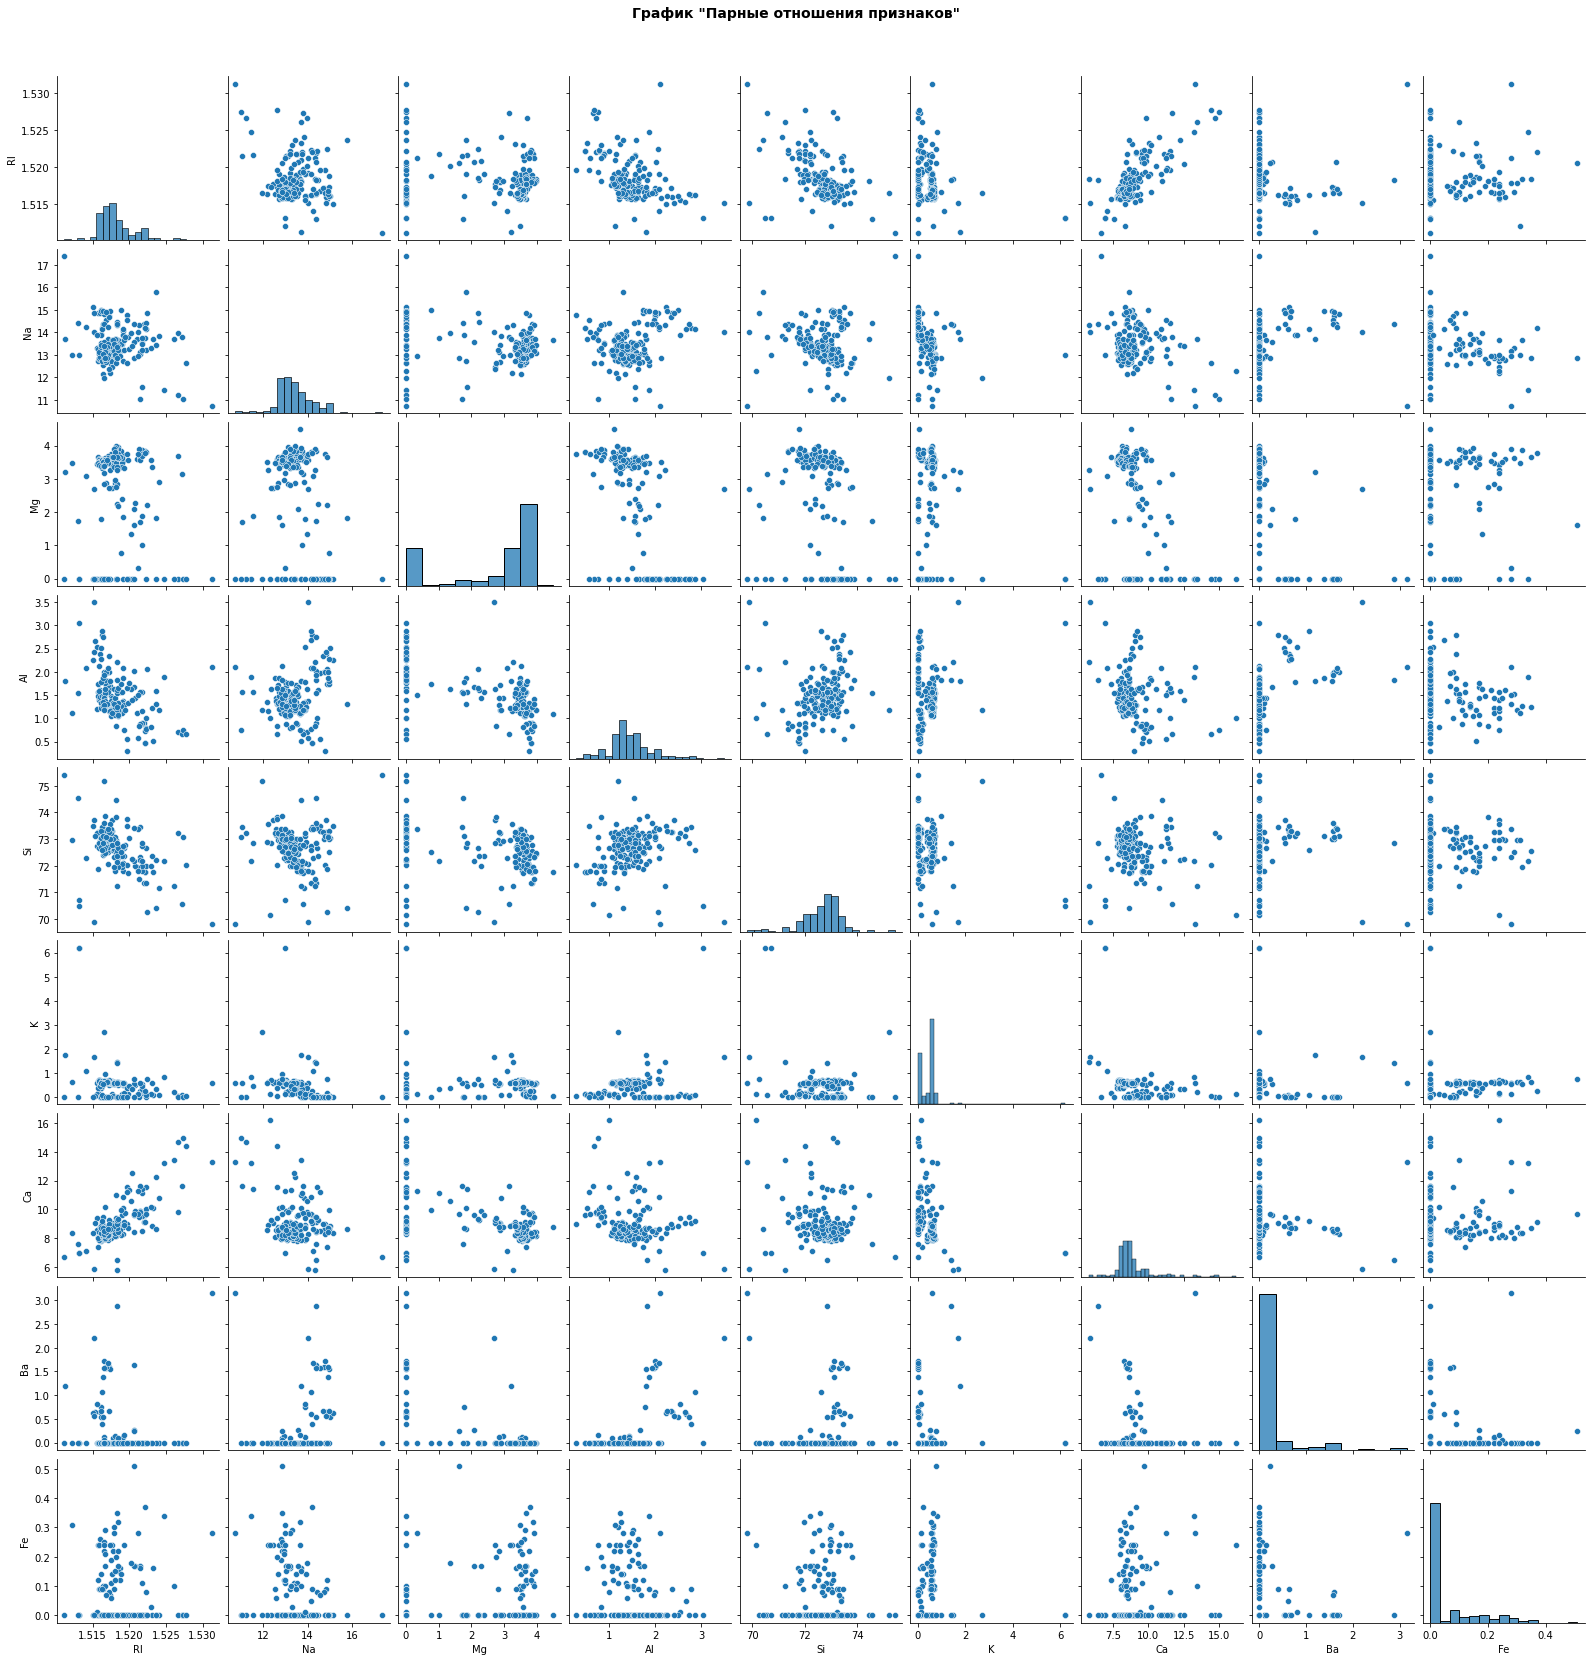

In [ ]:
sns_plot = sns.pairplot(data)
sns_plot.fig.suptitle('График "Парные отношения признаков"', 
                      y = 1.03, fontsize=14, fontweight='bold')
plt.show()

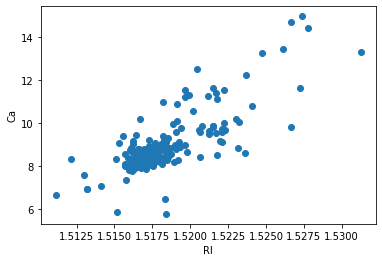

In [ ]:
col1 = 'RI'
col2 = 'Ca'

fig, ax = plt.subplots()
ax.scatter(data[col1], data[col2])
ax.set_xlabel(col1)
ax.set_ylabel(col2)

plt.show()

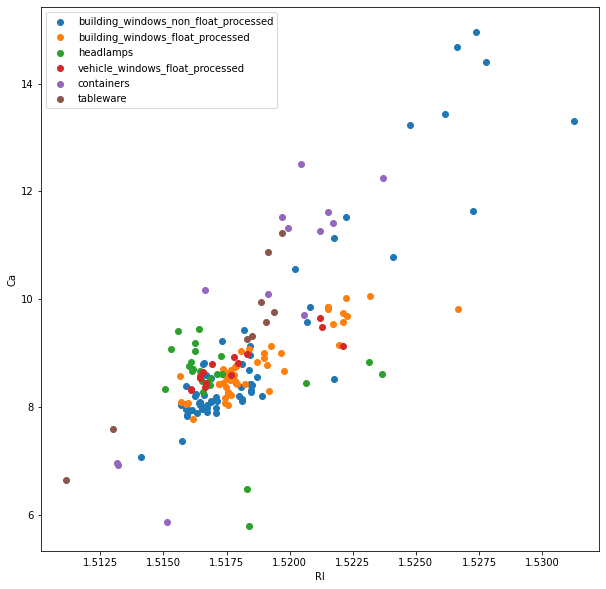

In [ ]:
col1 = 'RI'
col2 = 'Ca'

fig, ax = plt.subplots(figsize=(10,10))
for glassType in data['Class'].value_counts().index.values:
  ax.scatter(data[col1][data['Class']==glassType], data[col2][data['Class']==glassType], label=glassType)
ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


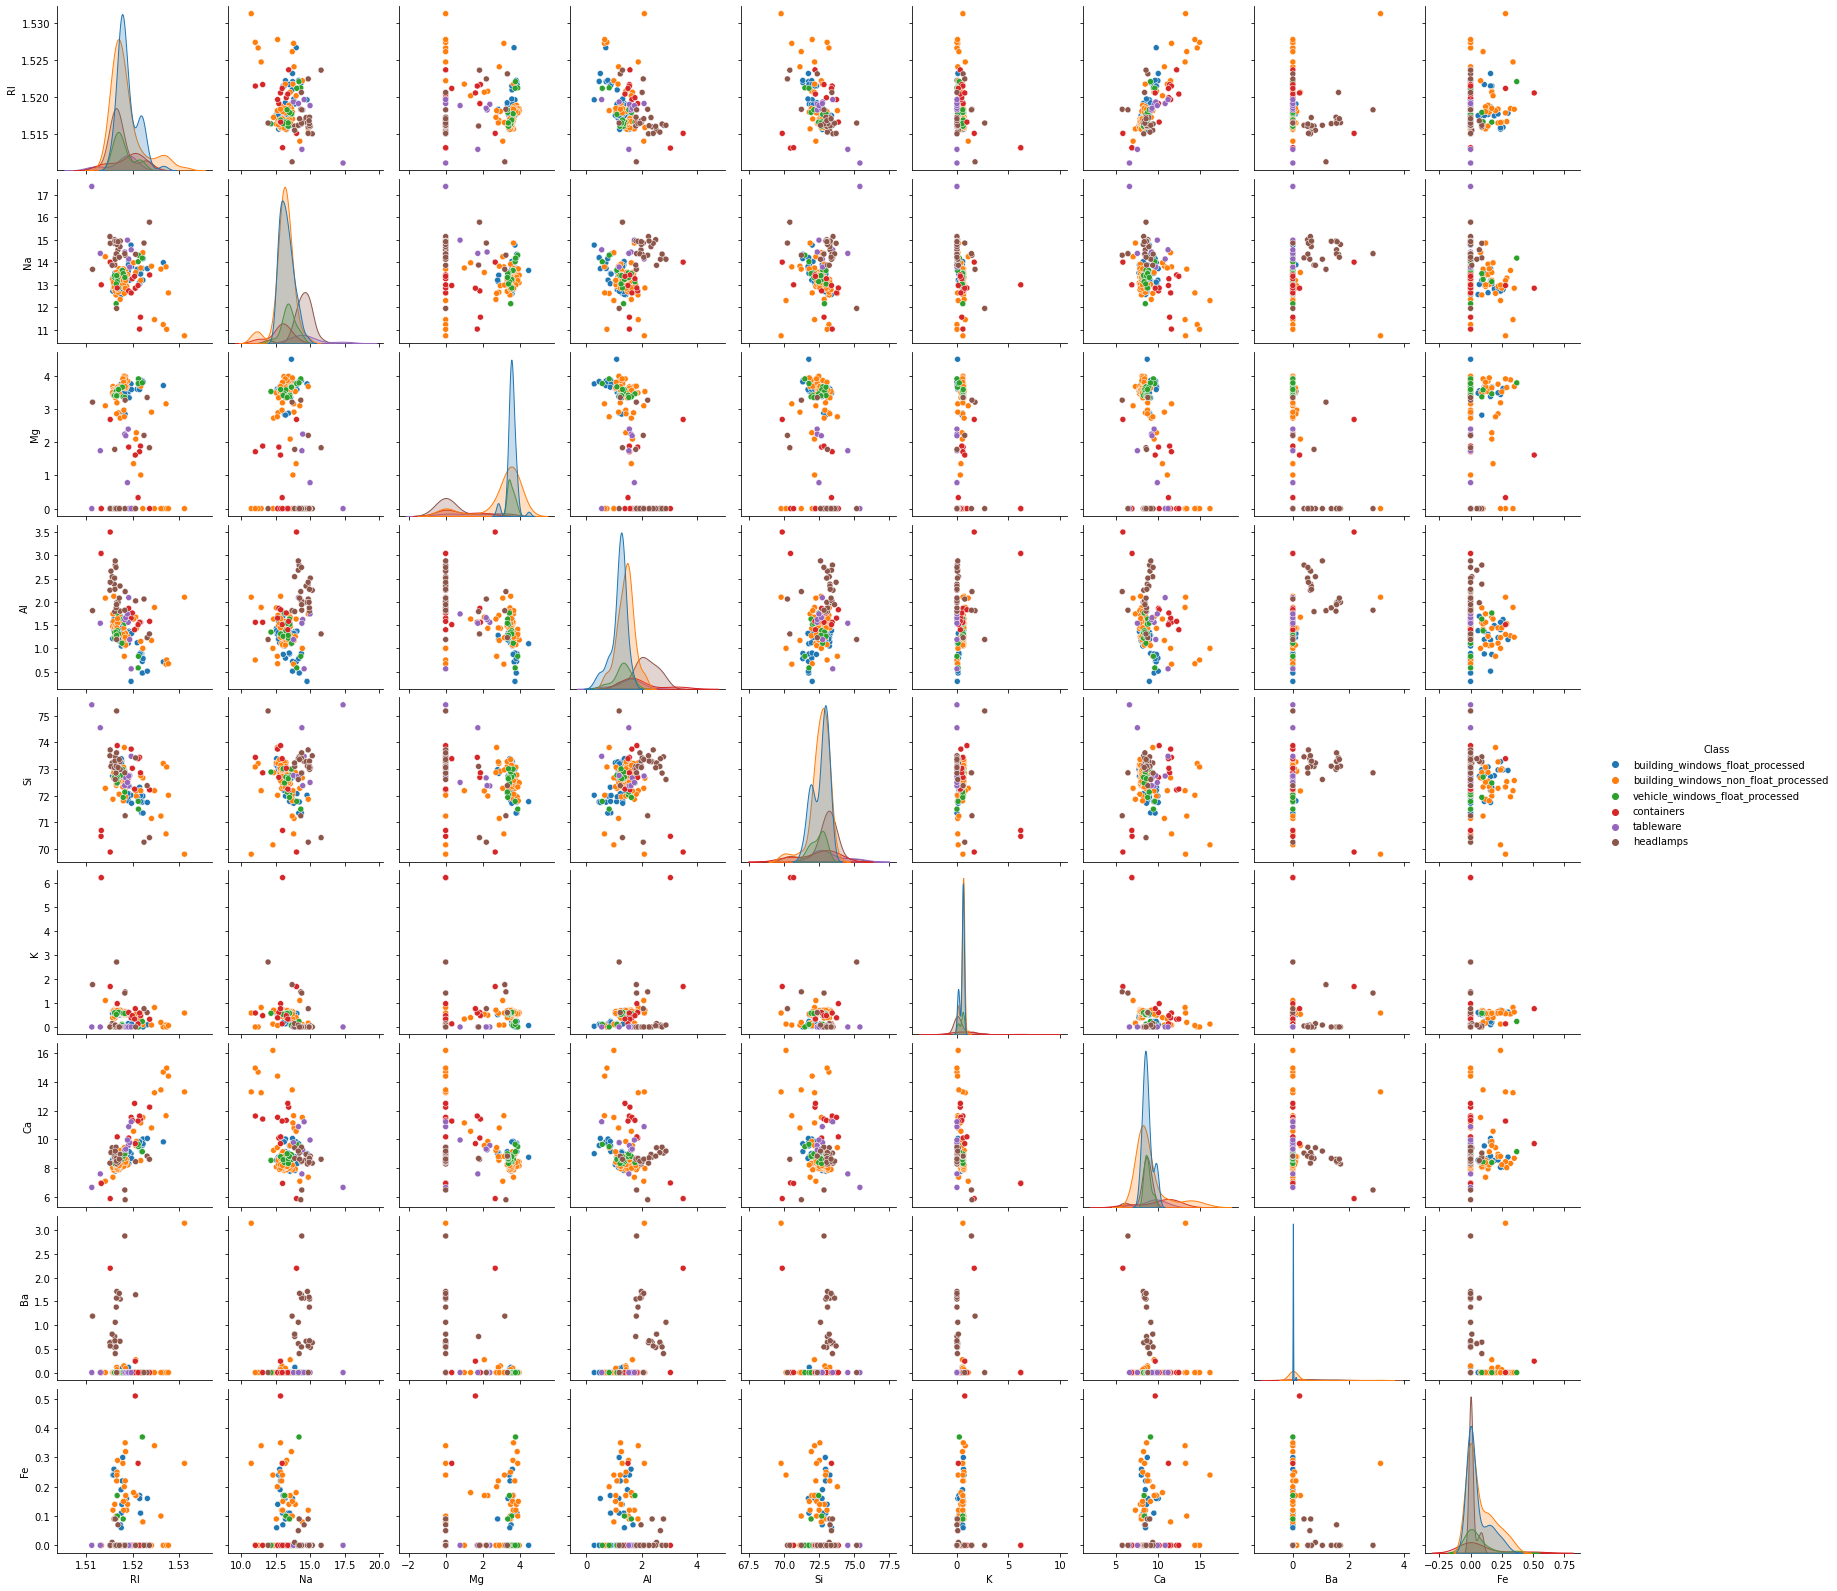

In [ ]:
sns.pairplot(data=data, hue='Class')
plt.show()

# NaN

In [ ]:
data.mean()

RI     1.518332
Na    13.410249
Mg     2.658966
Al     1.459026
Si    72.660149
K      0.504513
Ca     8.976716
Ba     0.168141
Fe     0.059282
dtype: float64

In [ ]:
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   203 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
data_fillna_mean['Class'].value_counts().index[0]

'building_windows_non_float_processed'

In [ ]:
data_fillna_mean['Class'].mode()

0    building_windows_non_float_processed
dtype: object

In [ ]:
data_fillna_mean['Class'].fillna(data_fillna_mean['Class'].value_counts().index[0],
                                 inplace=True)
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


Задание: сделать заполнение средним/модой по категориям

#Задание 1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      197 non-null    float64
 1   Na      199 non-null    float64
 2   Mg      195 non-null    float64
 3   Al      203 non-null    float64
 4   Si      195 non-null    float64
 5   K       203 non-null    float64
 6   Ca      203 non-null    float64
 7   Ba      201 non-null    float64
 8   Fe      203 non-null    float64
 9   Class   199 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
data['Class'].mode()

0    building_windows_non_float_processed
dtype: object

In [ ]:
data['Class'].fillna(data['Class'].value_counts().index[0],
                                 inplace=True)

In [ ]:
data_fillna_mean = pd.DataFrame()
for i in range(6):
  data_fillna = data.loc[data['Class'] == data['Class'].value_counts().index[i]]
  data_fillna = data_fillna.fillna(data_fillna.mean())
  data_fillna_mean = pd.concat([data_fillna_mean, data_fillna], ignore_index=True)
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


Задание: сделать заполнение средним/модой по категориям

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit( data_fillna_mean[data_fillna_mean.columns.values
                          [data_fillna_mean.columns.values != 'Class']] )

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.explained_variance_ratio_*100)

[4.77360729e+01 2.69374305e+01 1.09547207e+01 9.34554767e+00
 2.86848269e+00 1.51666163e+00 4.96132308e-01 1.44914986e-01
 3.66681233e-05]


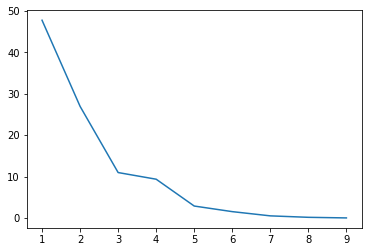

In [ ]:
_, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show()

In [ ]:
pcaData=pd.DataFrame(
    pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']]))
pcaNames=[]
for i in range(9):
  pcaNames.append('pc'+str(i+1))
pcaData.columns=pcaNames
pcaData.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-0.959541,-0.444792,0.320757,-0.171220,-0.264816,-0.096093,-0.078745,0.111525,-0.000657
1,-0.910762,-0.624724,0.317999,-0.291614,-0.090488,0.050183,-0.015732,-0.076844,0.000793
2,-0.973516,-0.204458,0.123019,-0.013946,-0.024354,-0.068651,-0.016883,-0.065761,-0.000831
3,-0.922777,-0.394299,0.243583,-0.733842,0.095469,0.122435,-0.006068,-0.069010,0.000026
4,-0.637585,-0.444205,0.031888,-0.105734,0.099808,0.109781,0.001141,0.094081,-0.000183


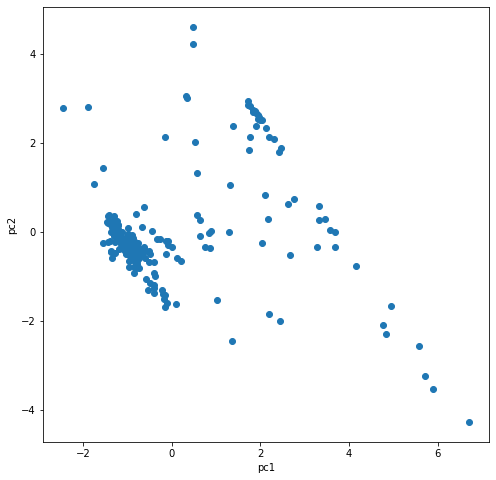

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(pcaData['pc1'], pcaData['pc2'])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')

plt.show()

In [ ]:
pcaData['Class'] = data_fillna_mean['Class'].copy()

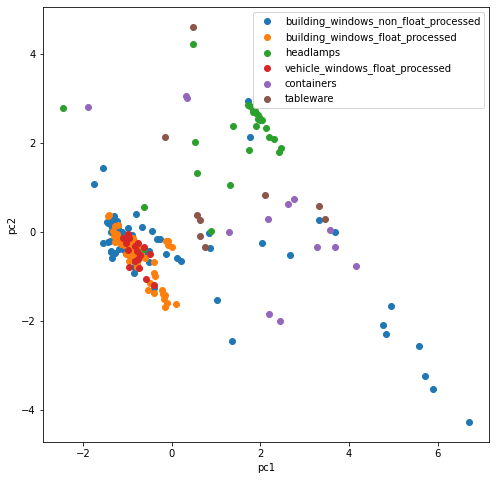

In [ ]:
col1 = 'pc1'
col2 = 'pc2'

fig, ax = plt.subplots(figsize=(8,8))

for glassType in pcaData['Class'].value_counts().index.values:
  ax.scatter(pcaData[col1][ pcaData['Class']==glassType ],
             pcaData[col2][ pcaData['Class']==glassType ],
             label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

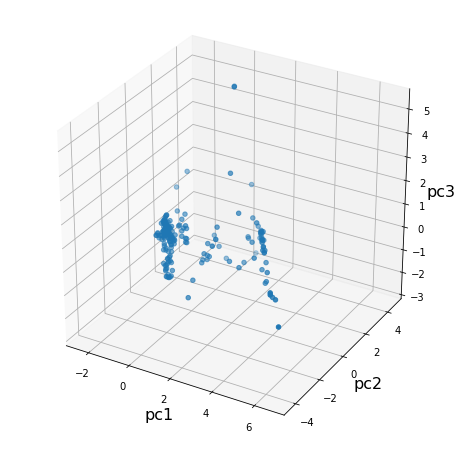

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.scatter(pcaData['pc1'], pcaData['pc2'], pcaData['pc3'])
ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)

plt.show()

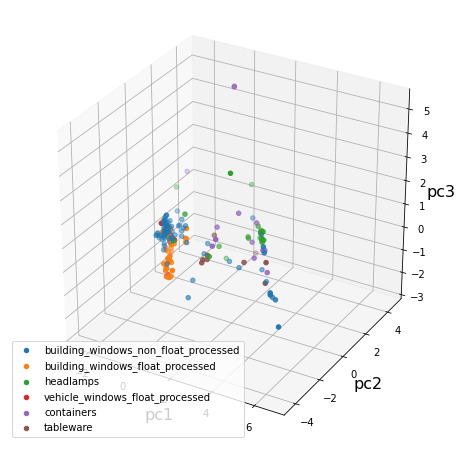

In [ ]:
col1 = 'pc1'
col2 = 'pc2'

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for glassType in pcaData['Class'].value_counts().index.values:
  ax.scatter(pcaData['pc1'][ pcaData['Class']==glassType ], 
             pcaData['pc2'][ pcaData['Class']==glassType ], 
             pcaData['pc3'][ pcaData['Class']==glassType ],
             label=glassType)

ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)
ax.legend()

plt.show()

# Задание 2


In [ ]:
corr = data_fillna_mean.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.213259,-0.094054,-0.383543,-0.430004,-0.275831,0.749106,-0.121756,0.134393
Na,-0.213259,1.000000,-0.255067,0.142040,-0.031651,-0.264000,-0.290216,0.440506,-0.232536
Mg,-0.094054,-0.255067,1.000000,-0.506620,-0.186156,-0.002548,-0.435202,-0.474248,0.098894
Al,-0.383543,0.142040,-0.506620,1.000000,-0.007653,0.324753,-0.225360,0.486195,-0.089815
Si,-0.430004,-0.031651,-0.186156,-0.007653,1.000000,-0.207612,-0.194095,0.089974,-0.077021
K,-0.275831,-0.264000,-0.002548,0.324753,-0.207612,1.000000,-0.289676,-0.051390,-0.008498
Ca,0.749106,-0.290216,-0.435202,-0.225360,-0.194095,-0.289676,1.000000,-0.202702,0.131880
Ba,-0.121756,0.440506,-0.474248,0.486195,0.089974,-0.051390,-0.202702,1.000000,-0.146267
Fe,0.134393,-0.232536,0.098894,-0.089815,-0.077021,-0.008498,0.131880,-0.146267,1.000000


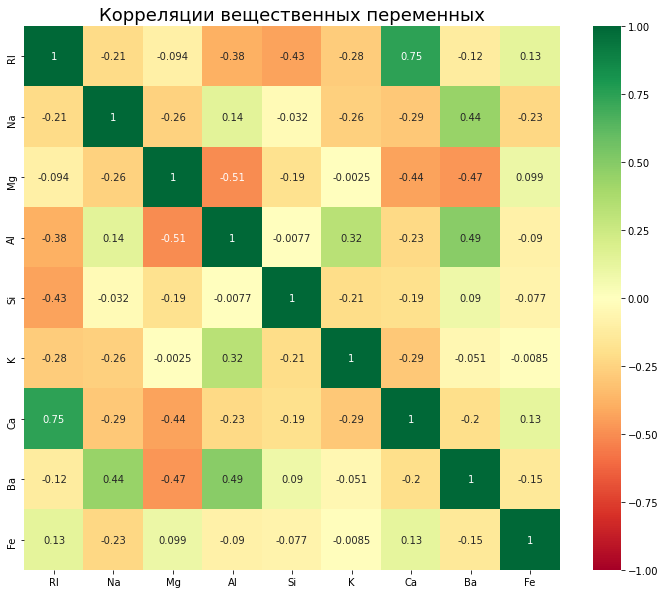

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='RdYlGn')

ax.set_title('Корреляции вещественных переменных', fontsize=18)

plt.show()

сильные корреляции (-1, -0.75) или (0.75, 1)

средние (-0.75, -0.45) или (0.45, 0.75)

слабые (-0.45, -0.25) или (0.25, 0.45)

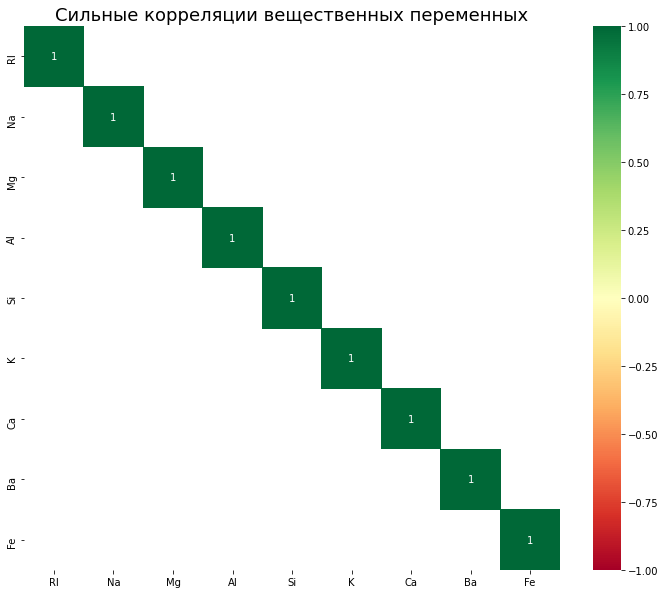

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr[(corr>=0.75)|(corr<=-0.75)], annot=True, vmax=1, vmin=-1, cmap='RdYlGn')

ax.set_title('Сильные корреляции вещественных переменных', fontsize=18)

plt.show()

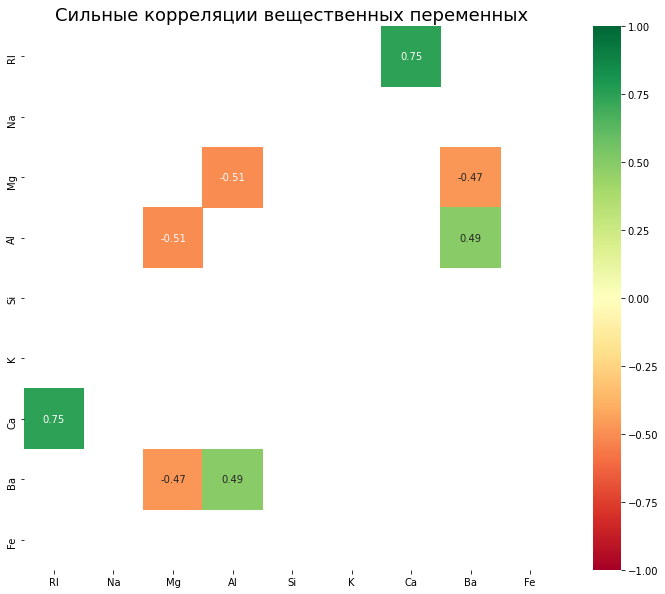

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr[(abs(corr)>=0.45)&(abs(corr)<0.75)], annot=True, vmax=1, vmin=-1, cmap='RdYlGn')

ax.set_title('Сильные корреляции вещественных переменных', fontsize=18)

plt.show()

# feature importance

In [ ]:
forest = ExtraTreesClassifier(n_estimators=100)

In [ ]:
#forest.fit(x,y)
forest.fit(
    data_fillna_mean[ data_fillna_mean.columns.values[data_fillna_mean.columns.values!='Class'] ], 
    data_fillna_mean['Class']
    )

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
forest.feature_importances_

array([0.14061417, 0.09492163, 0.18156835, 0.13726904, 0.08990415,
       0.09978312, 0.133287  , 0.07056158, 0.05209096])

In [ ]:
np.sort(forest.feature_importances_, )[::-1]

array([0.18156835, 0.14061417, 0.13726904, 0.133287  , 0.09978312,
       0.09492163, 0.08990415, 0.07056158, 0.05209096])

In [ ]:
np.argsort(forest.feature_importances_, )[::-1]

array([2, 0, 3, 6, 5, 1, 4, 7, 8])

In [ ]:
importances = forest.feature_importances_
indices = np.argsort(forest.feature_importances_, )[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(9):
    print("%d. feature %s (%f)" % (f + 1, data_fillna_mean.columns.values[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature Mg (0.181568)
2. feature RI (0.140614)
3. feature Al (0.137269)
4. feature Ca (0.133287)
5. feature K (0.099783)
6. feature Na (0.094922)
7. feature Si (0.089904)
8. feature Ba (0.070562)
9. feature Fe (0.052091)


In [ ]:
std = np.std( [tree.feature_importances_ for tree in forest.estimators_], axis=0)
std

array([0.04414435, 0.03463707, 0.0475984 , 0.04879413, 0.02977076,
       0.0364882 , 0.04413606, 0.05488264, 0.01741861])

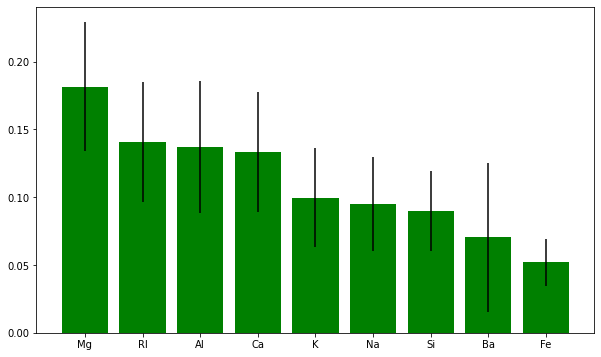

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(data_fillna_mean.columns.values[indices], importances[indices],
       color="g", yerr=std[indices], align="center")

plt.show()